In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image


In [11]:
#Kiểm tra thư mục datasets

os.listdir("../input/chest-xray-pneumonia/chest_xray")

['chest_xray', '__MACOSX', 'val', 'test', 'train']

In [12]:
base_dir = "../input/chest-xray-pneumonia/chest_xray"

def count_files_in_dir(path):
    return len(os.listdir(path))
# Train
train_normal = count_files_in_dir(os.path.join(base_dir, "train/NORMAL"))
train_pneumonia = count_files_in_dir(os.path.join(base_dir, "train/PNEUMONIA"))

# Validation
val_normal = count_files_in_dir(os.path.join(base_dir, "val/NORMAL"))
val_pneumonia = count_files_in_dir(os.path.join(base_dir, "val/PNEUMONIA"))

# Test
test_normal = count_files_in_dir(os.path.join(base_dir, "test/NORMAL"))
test_pneumonia = count_files_in_dir(os.path.join(base_dir, "test/PNEUMONIA"))

# In ra kết quả
print("=== Dataset Summary ===")
print(f"Train - NORMAL: {train_normal} images")
print(f"Train - PNEUMONIA: {train_pneumonia} images")
print(f"Validation - NORMAL: {val_normal} images")
print(f"Validation - PNEUMONIA: {val_pneumonia} images")
print(f"Test - NORMAL: {test_normal} images")
print(f"Test - PNEUMONIA: {test_pneumonia} images")

=== Dataset Summary ===
Train - NORMAL: 1341 images
Train - PNEUMONIA: 3875 images
Validation - NORMAL: 8 images
Validation - PNEUMONIA: 8 images
Test - NORMAL: 234 images
Test - PNEUMONIA: 390 images


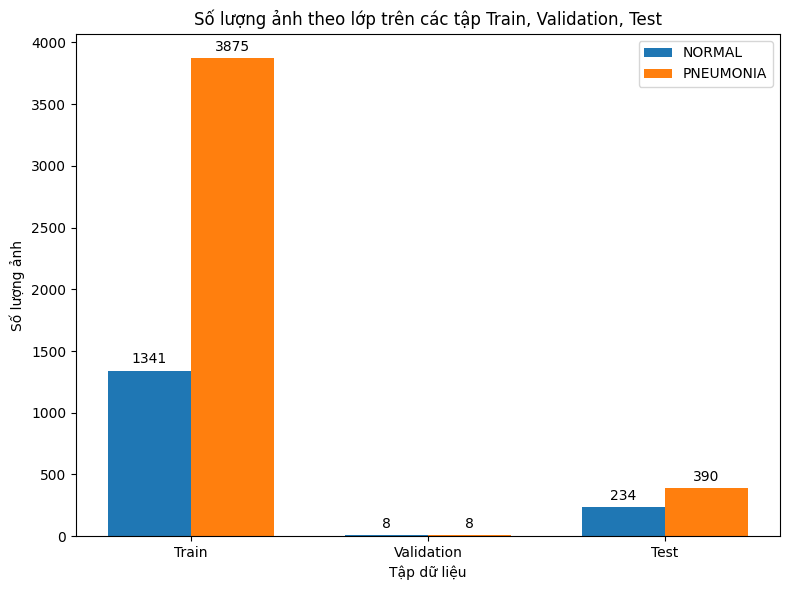

In [13]:
categories = ['Train', 'Validation', 'Test']
normal_counts = [train_normal, val_normal, test_normal]
pneumonia_counts = [train_pneumonia, val_pneumonia, test_pneumonia]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, normal_counts, width, label='NORMAL')
bars2 = ax.bar(x + width/2, pneumonia_counts, width, label='PNEUMONIA')

ax.set_xlabel('Tập dữ liệu')
ax.set_ylabel('Số lượng ảnh')
ax.set_title('Số lượng ảnh theo lớp trên các tập Train, Validation, Test')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

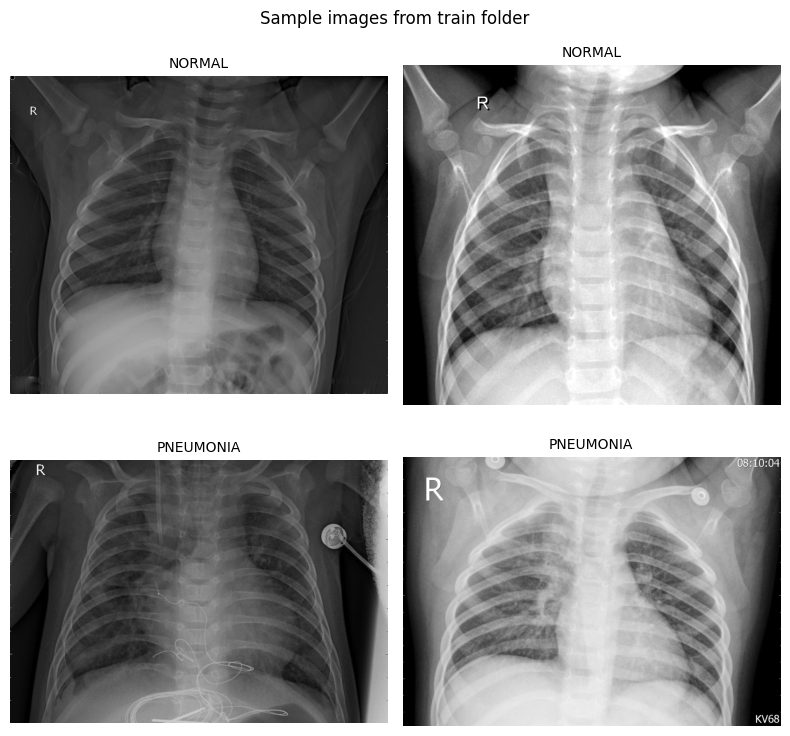

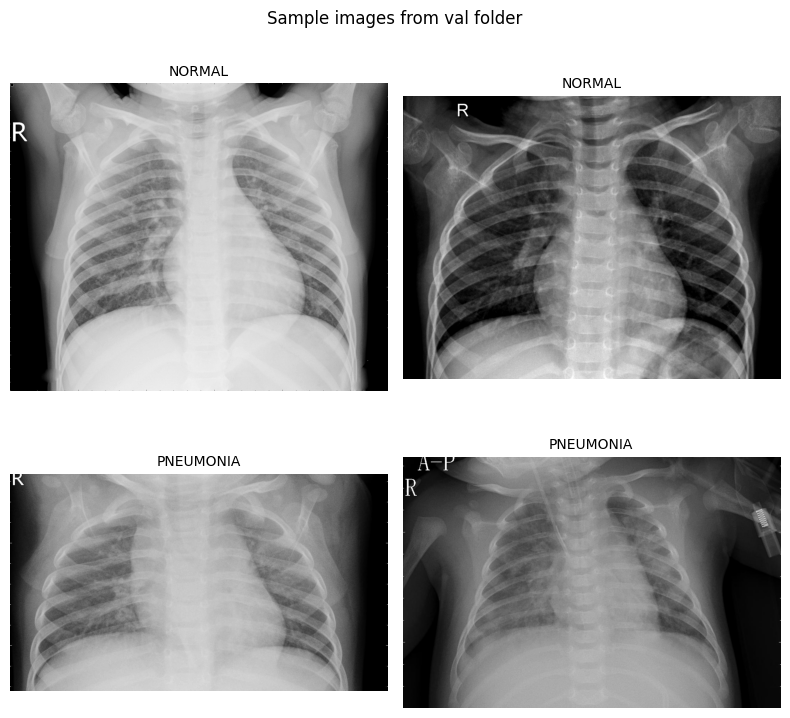

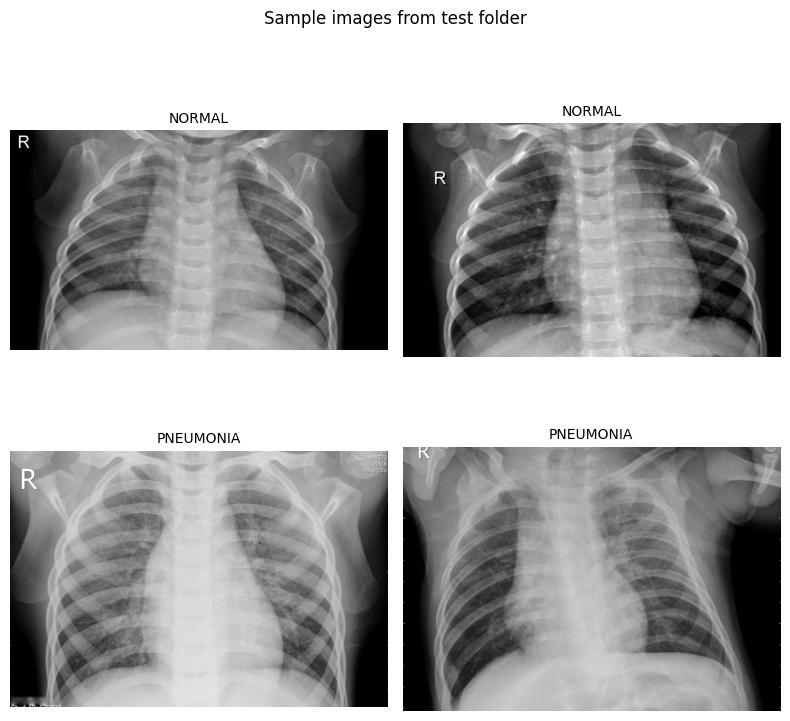

In [14]:
def show_sample_images(folder):
    classes = ['NORMAL', 'PNEUMONIA']
    fig, axes = plt.subplots(2, 2, figsize=(8,8))
    fig.suptitle(f"Sample images from {folder} folder")

    for i, cls in enumerate(classes):
        folder_path = os.path.join(base_dir, folder, cls)
        images = os.listdir(folder_path)[:2]  # lấy 2 ảnh đầu

        for j, img_name in enumerate(images):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            axes[i,j].imshow(img, cmap='gray')
            axes[i,j].axis('off')
            axes[i,j].set_title(f"{cls}", fontsize=10)
    plt.tight_layout()
    plt.show()

show_sample_images("train")
show_sample_images("val")
show_sample_images("test")

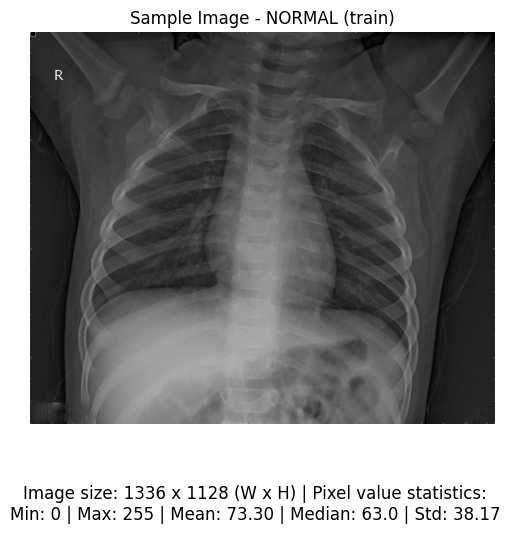

In [6]:
sample_image_path = os.path.join(base_dir, "train", "NORMAL", os.listdir(os.path.join(base_dir, "train", "NORMAL"))[0])

# Đọc ảnh dưới dạng numpy array (grayscale)
img = Image.open(sample_image_path).convert('L')  # convert sang grayscale
img_np = np.array(img)

# Lấy chiều cao và chiều rộng
height, width = img_np.shape

# Tính các thông số toán học về điểm ảnh
min_pixel = np.min(img_np)
max_pixel = np.max(img_np)
mean_pixel = np.mean(img_np)
median_pixel = np.median(img_np)
std_pixel = np.std(img_np)

# Hiển thị ảnh và in thông số
plt.figure(figsize=(6,6))
plt.imshow(img_np, cmap='gray')
plt.axis('off')
plt.title("Sample Image - NORMAL (train)")

plt.figtext(0.5, 0.01,
            f"Image size: {width} x {height} (W x H) | Pixel value statistics:\nMin: {min_pixel} | Max: {max_pixel} | Mean: {mean_pixel:.2f} | Median: {median_pixel} | Std: {std_pixel:.2f}",
            ha="center", fontsize=12)

plt.show()

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


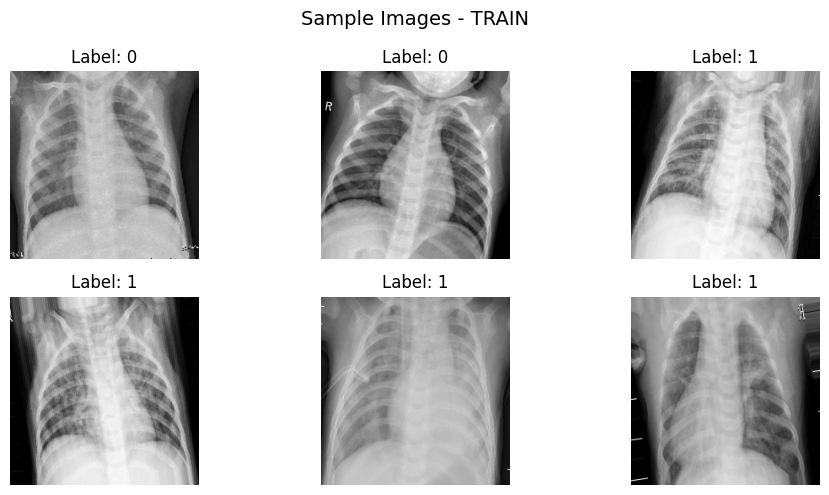

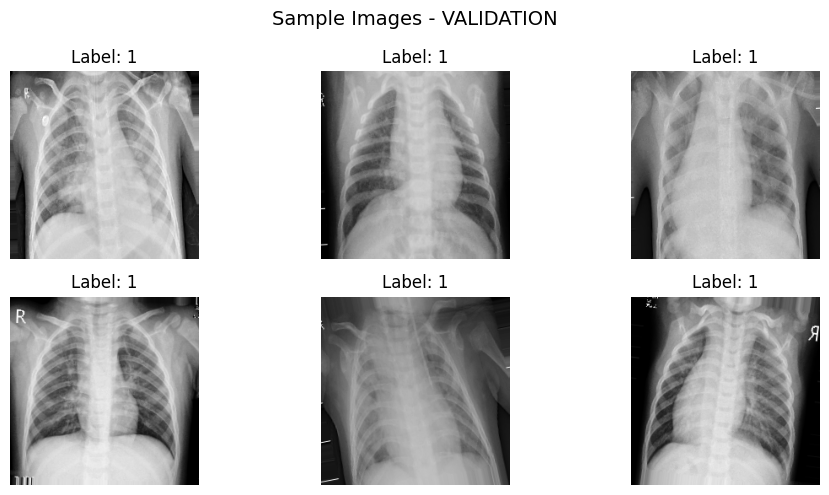

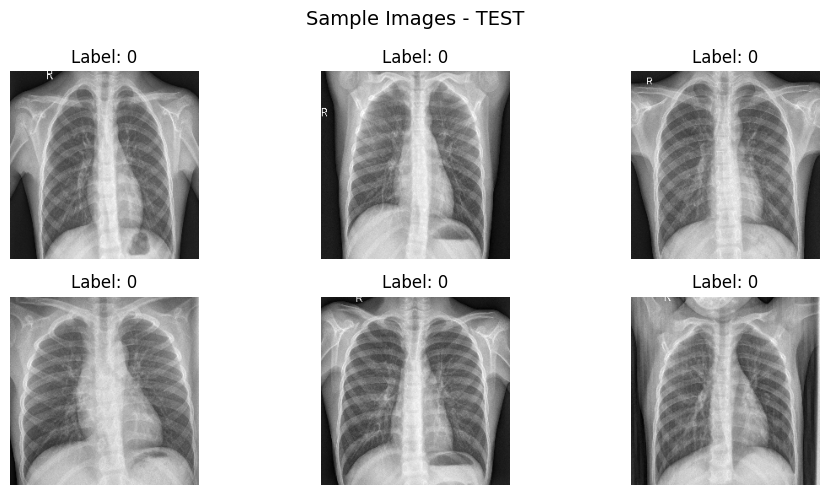

In [7]:
# ====== Bước 1: Đường dẫn thư mục ======
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# ====== Bước 2: Khởi tạo ImageDataGenerator ======
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# ====== Bước 3: Load dữ liệu với mode grayscale ======
train_generator = train_val_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode="grayscale",     # RẤT QUAN TRỌNG: Đọc ảnh 1 kênh
    batch_size=32,
    class_mode="binary",
    subset="training",
    shuffle=True,
    seed=42
)

val_generator = train_val_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary",
    subset="validation",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# ====== Bước 4: Hiển thị hình ảnh grayscale thật sự ======
def visualize_samples(generator, title):
    images, labels = next(generator)
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        img = images[i].reshape(224, 224)  # từ (224, 224, 1) -> (224, 224)
        plt.imshow(img, cmap="gray")
        plt.title(f"Label: {int(labels[i])}")
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

visualize_samples(train_generator, "Sample Images - TRAIN")
visualize_samples(val_generator, "Sample Images - VALIDATION")
visualize_samples(test_generator, "Sample Images - TEST")

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# ====== Khởi tạo mô hình Sequential ======
model = Sequential()

# ====== Convolution Block 1 ======
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# ====== Convolution Block 2 ======
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# ====== Convolution Block 3 ======
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# ====== Flatten và Fully Connected ======
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Giảm overfitting

# ====== Output Layer ======
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# ====== Compile Model ======
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ====== Kiểm tra cấu trúc mô hình ======
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,409 (42.61 MB)

 Trainable params: 11,168,961 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
history = model.fit(
    train_generator,              # Dữ liệu huấn luyện
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,  # Dữ liệu validation
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,                    # Số lần lặp toàn bộ tập dữ liệu
    verbose=1
)

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 462s 4s/step - accuracy: 0.9255 - loss: 0.2116 - val_accuracy: 0.7432 - val_loss: 8.1166
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 195ms/step - accuracy: 0.9375 - loss: 0.1740 - val_accuracy: 0.7422 - val_loss: 8.1805
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 463s 4s/step - accuracy: 0.9424 - loss: 0.1677 - val_accuracy: 0.7422 - val_loss: 5.9875
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.9062 - loss: 0.2176 - val_accuracy: 0.7461 - val_loss: 5.8655
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.9480 - loss: 0.1386 - val_accuracy: 0.7480 - val_loss: 2.3099
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 195ms/step - accuracy: 0.9688 - loss: 0.1457 - val_accuracy: 0.7441 - val_loss: 2.5006
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.9437 - loss: 0.1316 - val_accuracy: 0.8828 - val_loss: 0.3250
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 194ms/step - accuracy: 0.9375 - loss: 0.0838 - 

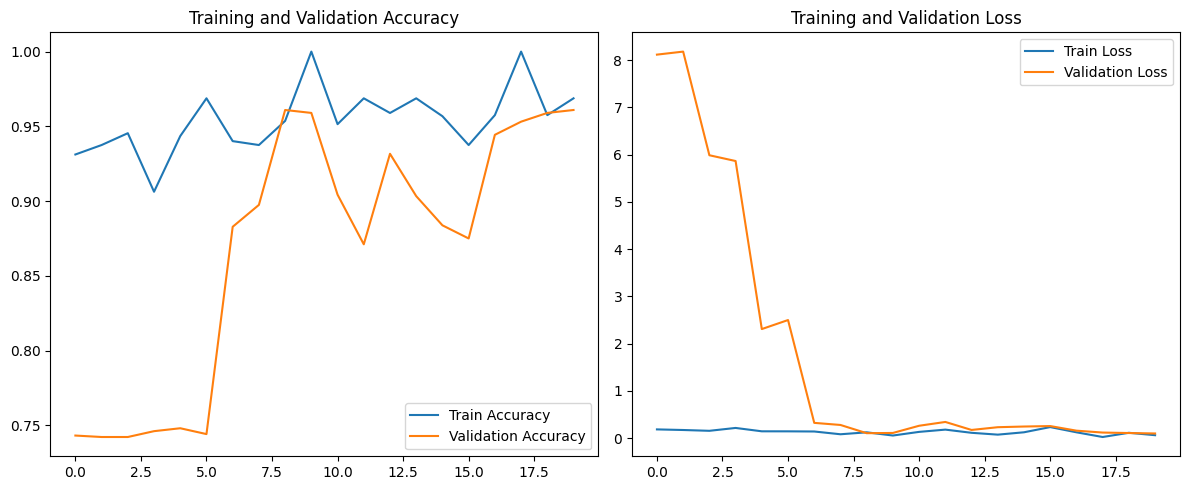

In [18]:
import matplotlib.pyplot as plt

# ====== Vẽ biểu đồ độ chính xác và độ mất mát ======
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

# Gọi hàm vẽ
plot_training_history(history)


In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Dự đoán xác suất (giá trị từ 0 đến 1)
pred_probs = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
# Chuyển sang nhãn nhị phân (0 hoặc 1)
y_pred = (pred_probs > 0.5).astype("int32").flatten()

# Lấy nhãn thật từ generator
y_true = test_generator.classes

20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 678ms/step


In [21]:
# In báo cáo classification
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

# Ma trận nhầm lẫn
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_true, y_pred)
print(cm)

=== Classification Report ===
              precision    recall  f1-score   support

      NORMAL       0.97      0.60      0.74       234
   PNEUMONIA       0.81      0.99      0.89       390

    accuracy                           0.84       624
   macro avg       0.89      0.80      0.82       624
weighted avg       0.87      0.84      0.83       624

=== Confusion Matrix ===
[[141  93]
 [  4 386]]


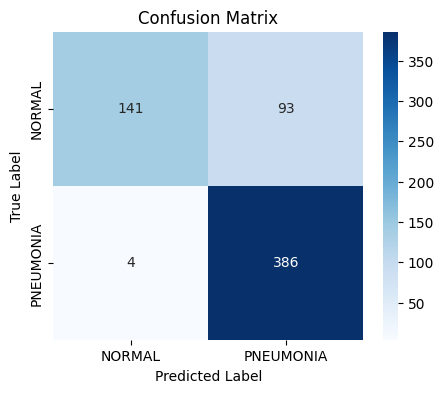

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()